#Import Libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

from sklearn import preprocessing
from sklearn import utils

#Data Set

In [66]:
Train='/content/drive/MyDrive/data1 files/pubg_train.csv'
Test='/content/drive/MyDrive/data1 files/pubg_test.csv'
train=pd.read_csv(Train)
test=pd.read_csv(Test)

In [ ]:
train.shape

(4446966, 30)

In [ ]:
test.shape

(1934174, 29)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 30 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   Id               object 
 2   groupId          object 
 3   matchId          object 
 4   assists          int64  
 5   boosts           float64
 6   damageDealt      float64
 7   DBNOs            int64  
 8   headshotKills    int64  
 9   heals            int64  
 10  killPlace        int64  
 11  killPoints       float64
 12  kills            int64  
 13  killStreaks      float64
 14  longestKill      float64
 15  matchDuration    int64  
 16  matchType        object 
 17  maxPlace         float64
 18  numGroups        float64
 19  rankPoints       int64  
 20  revives          int64  
 21  rideDistance     float64
 22  roadKills        int64  
 23  swimDistance     float64
 24  teamKills        float64
 25  vehicleDestroys  int64  
 26  walkDistance     float64
 27  weaponsAcqui

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934174 entries, 0 to 1934173
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   Id               object 
 2   groupId          object 
 3   matchId          object 
 4   assists          int64  
 5   boosts           float64
 6   damageDealt      float64
 7   DBNOs            int64  
 8   headshotKills    int64  
 9   heals            int64  
 10  killPlace        int64  
 11  killPoints       float64
 12  kills            int64  
 13  killStreaks      float64
 14  longestKill      float64
 15  matchDuration    int64  
 16  matchType        object 
 17  maxPlace         float64
 18  numGroups        float64
 19  rankPoints       int64  
 20  revives          int64  
 21  rideDistance     float64
 22  roadKills        int64  
 23  swimDistance     float64
 24  teamKills        float64
 25  vehicleDestroys  int64  
 26  walkDistance     float64
 27  weaponsAcqui

In [67]:
train=train.drop('Unnamed: 0',axis=1)
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0.0,0.0,0,0,0,60,...,0,0.0000,0,0.00,0.0,0,244.80,1,1466,0.4443
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0.0,91.5,0,0,0,57,...,0,0.0045,0,11.04,0.0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0.0,68.0,0,0,0,47,...,0,0.0000,0,0.00,0.0,0,161.80,2,0,0.7754
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0.0,32.9,0,0,0,75,...,0,0.0000,0,0.00,0.0,0,202.80,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0.0,100.0,0,0,0,45,...,0,0.0000,0,0.00,0.0,0,49.75,2,0,0.1875


In [68]:
test=test.drop('Unnamed: 0',axis=1)
test.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0.0,51.47,0,0,0,73,...,1500,0,0.0,0,0.0,0.0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4.0,179.10,0,0,2,11,...,1503,2,4668.0,0,0.0,0.0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0.0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0.0,0,788.0,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0.0,65.50,0,0,0,54,...,1465,0,0.0,0,0.0,0.0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4.0,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0.0,0,2964.0,4,0


In [ ]:
train.isnull().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts             6664
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints         1334
kills                 0
killStreaks        6663
longestKill        1777
matchDuration         0
matchType           889
maxPlace           3998
numGroups          1778
rankPoints            0
revives               0
rideDistance       1777
roadKills             0
swimDistance       4000
teamKills          6220
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          1
dtype: int64

In [ ]:
test.isnull().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts             3091
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints         1933
kills                 0
killStreaks         773
longestKill        2900
matchDuration         0
matchType           193
maxPlace           1740
numGroups          2127
rankPoints            0
revives               0
rideDistance       1353
roadKills             0
swimDistance       3091
teamKills           386
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
dtype: int64

In [ ]:
#train=train.fillna(0)
#train.isnull().sum()

In [ ]:
#test=test.fillna(0)
#test.isnull().sum()

#Kills

In [ ]:
print('Maximum Kills : ',train.kills.max())

Maximum Kills :  72


In [ ]:
print('Minimum Kill : ',train.kills.min())

Minimum Kill :  0


In [ ]:
print('Average Kill by Player : ',train.kills.mean())

Average Kill by Player :  0.9247833241810259


In [ ]:
print('56% Player have kill less than or equal to : ',train.kills.quantile(0.56))

56% Player have kill less than or equal to :  0.0


In [ ]:
print('77% Player have kill less than or equal to : ',train.kills.quantile(0.77))

77% Player have kill less than or equal to :  1.0


In [ ]:
print('88% Player have kills less than or equal to : ',train.kills.quantile(0.88))

88% Player have kills less than or equal to :  2.0


In [ ]:
print('93% Player have kills less than or equal to : ',train.kills.quantile(0.93))

93% Player have kills less than or equal to :  3.0


In [ ]:
print('96% Player have kills less than or equal to : ',train.kills.quantile(0.96))

96% Player have kills less than or equal to :  4.0


In [ ]:
print('97% Player have kills less than or equal to : ',train.kills.quantile(0.97))

97% Player have kills less than or equal to :  5.0


In [ ]:
print('99% Player have kills less than or equal to : ',train.kills.quantile(0.99))

99% Player have kills less than or equal to :  7.0


In [ ]:
print(len(train[train['winPlacePerc']==1]),'Players Won without a Kill')

127573 Players Won without a Kill


In [ ]:
data=train[train['damageDealt']==0].copy()
print(len(data[data['winPlacePerc']==1]),'Players Won without Damage')

4770 Players Won without Damage


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


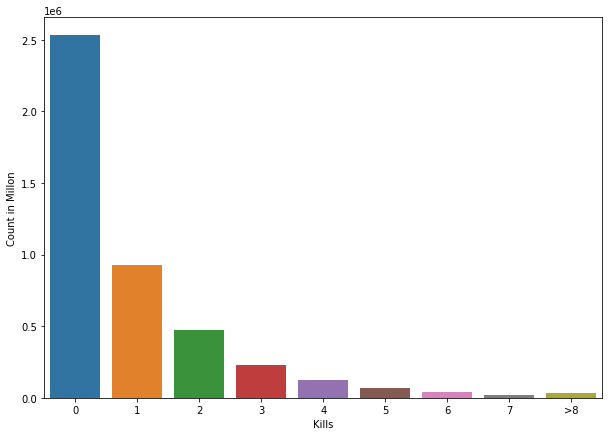

In [ ]:
data=train.copy()
data.loc[data.kills > data.kills.quantile(0.99)]='>8'
plt.figure(figsize=(10,7))
sns.countplot(data.kills.astype('str').sort_values())
plt.xlabel('Kills')
plt.ylabel('Count in Millon')
plt.show()
plt.close()

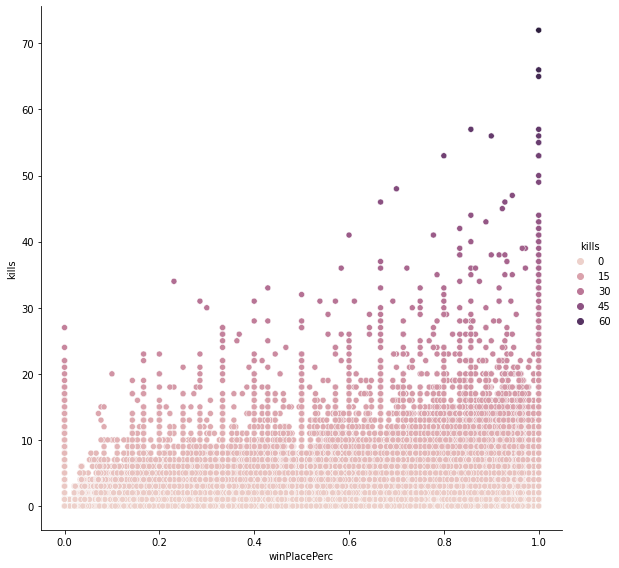

In [ ]:
sns.relplot(x="winPlacePerc", y="kills", data=train,hue='kills',height=8)
plt.show()

In [ ]:
# Create feature totalDistance
train['totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']
# Create feature killsWithoutMoving
train['killsWithoutMoving'] = ((train['kills'] > 0) & (train['totalDistance'] == 0))
# Create headshot_rate feature
train['headshot_rate'] = train['headshotKills'] / train['kills']
train['headshot_rate'] = train['headshot_rate'].fillna(0)

#Walk

In [ ]:
print('Maximum Walking Distance : ',train.walkDistance.max())

Maximum Walking Distance :  25780.0


In [ ]:
print('Minimum Walking Distance : ',train.walkDistance.min())

Minimum Walking Distance :  0.0


In [ ]:
print("The average person walks for {:.1f}m".format(train['walkDistance'].mean()))

The average person walks for 1154.2m


In [ ]:
print("99% of people have walked {}m or less".format(train['walkDistance'].quantile(0.99)))

99% of people have walked 4396.0m or less


In [ ]:
print("{} players walked 0 meters.".format(len(train[train['walkDistance'] == 0])))

99603 players walked 0 meters.


In [ ]:
print("{:.4f}% players walked 0 meters.".format(100*len(train[train['walkDistance']==0])/len(train)))

2.2398% players walked 0 meters.


In [ ]:
print("This means that they die before even taking a step or they are afk (more possible)")

This means that they die before even taking a step or they are afk (more possible)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


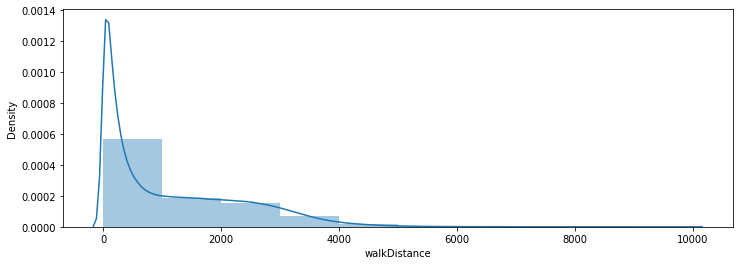

In [ ]:
# Plot the distribution of walkDistance
plt.figure(figsize=(12,4))
sns.distplot(train['walkDistance'], bins=10)
plt.show()
plt.close()

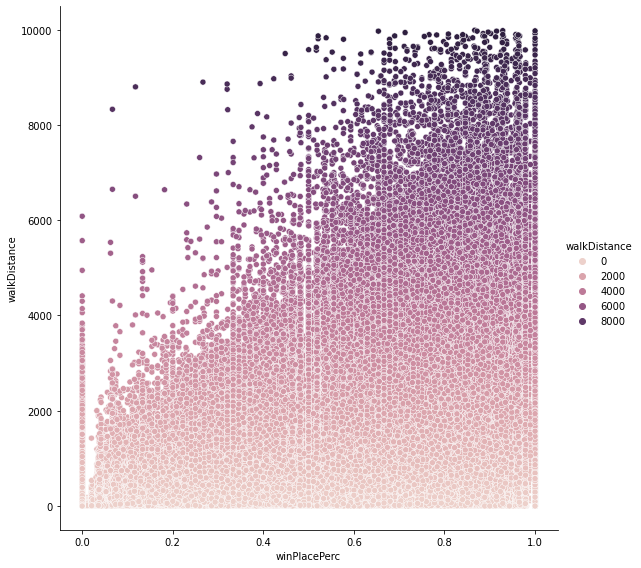

<function matplotlib.pyplot.close(fig=None)>

In [ ]:
sns.relplot(x="winPlacePerc", y="walkDistance",  data=train,hue="walkDistance", height=8)
plt.show()
plt.close

In [ ]:
# walkDistance anomalies
display(train[train['walkDistance'] >= 10000].shape)
train[train['walkDistance'] >= 10000].head(10)

(219, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate
23026,8a6562381dd83f,23e638cd6eaf77,b0a804a610e9b0,0,1.0,0.00,0,0,0,44,...,9.88,0.0,0,13530.0,7,0,0.8164,13540.3011,False,0.0
34344,5a591ecc957393,6717370b51c247,a15d93e7165b05,0,3.0,23.22,0,0,1,34,...,40.88,0.0,0,10030.0,7,1533,0.9473,10070.9173,False,0.0
49312,582685f487f0b4,338112cd12f1e7,d0afbf5c3a6dc9,0,4.0,117.20,1,0,1,24,...,36.75,0.0,0,12410.0,3,0,0.9130,12446.7588,False,0.0
68590,8c0d9dd0b4463c,c963553dc937e9,926681ea721a47,0,1.0,32.34,0,0,1,46,...,45.80,0.0,0,11590.0,3,1563,0.8335,12483.8000,False,0.0
94400,d441bebd01db61,7e179b3366adb8,923b57b8b834cc,1,1.0,73.06,0,0,3,27,...,45.62,0.0,0,10440.0,6,1488,0.8193,11490.6200,False,0.0
125103,db5a0cdc969dcb,50cc466757950e,c306a9745c4c1d,0,4.0,37.72,0,0,7,47,...,38.75,0.0,0,12790.0,5,1500,0.7340,12828.7878,False,0.0
136421,955e60b09a96b1,30df08fe22a901,8669d01725f135,0,1.0,0.00,0,0,1,46,...,30.81,0.0,0,10370.0,3,0,0.6960,12223.8100,False,0.0
136476,0d75d05b5c988c,3da040ce77cd0b,65bc5211a569dd,0,3.0,0.00,0,0,0,41,...,197.20,0.0,0,10140.0,5,1772,0.9330,14917.2000,False,0.0
154080,7e8a71d23381cd,e2c9f4f92840b2,a721de1aa05408,0,3.0,0.00,0,0,13,46,...,16.70,0.0,0,10220.0,4,0,0.8604,12636.7000,False,0.0
154128,32fdde4c716787,390ae9a51c11b8,82610ed1b4d033,0,4.0,52.16,0,0,7,25,...,29.83,0.0,0,10860.0,6,0,0.8936,10889.8614,False,0.0


In [ ]:
# Remove outliers
train.drop(train[train['walkDistance'] >= 10000].index, inplace=True)

#Ride Distance

In [ ]:
print("while the formula 1 champion drived for {}m.".format(train['rideDistance'].max()))

while the formula 1 champion drived for 40700.0m.


In [ ]:
print("while the noob drived for {}m.".format(train['rideDistance'].min()))

while the noob drived for 0.0m.


In [ ]:
print("99% of people have drived {}m or less".format(train['rideDistance'].quantile(0.99)))

99% of people have drived 6970.0m or less


In [ ]:
print("The average person drives for {:.1f}m".format(train['rideDistance'].mean()))

The average person drives for 606.1m


In [ ]:
print("{} players drived for 0 meters.".format(len(train[train['rideDistance'] == 0])))

3308089 players drived for 0 meters.


In [ ]:
print("{:.4f}% players drived for 0 meters.".format(100*len(train[train['rideDistance']==0])//len(train)))

74.0000% players drived for 0 meters.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


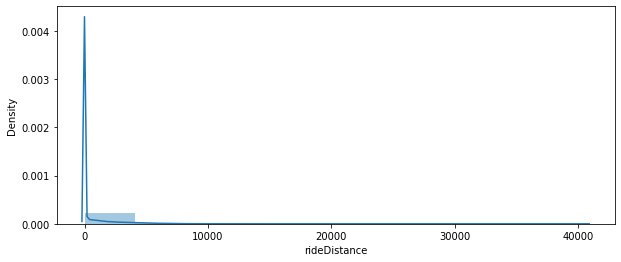

In [ ]:
# Plot the distribution of rideDistance
plt.figure(figsize=(10,4))
sns.distplot(train['rideDistance'], bins=10)
plt.show()
plt.close()

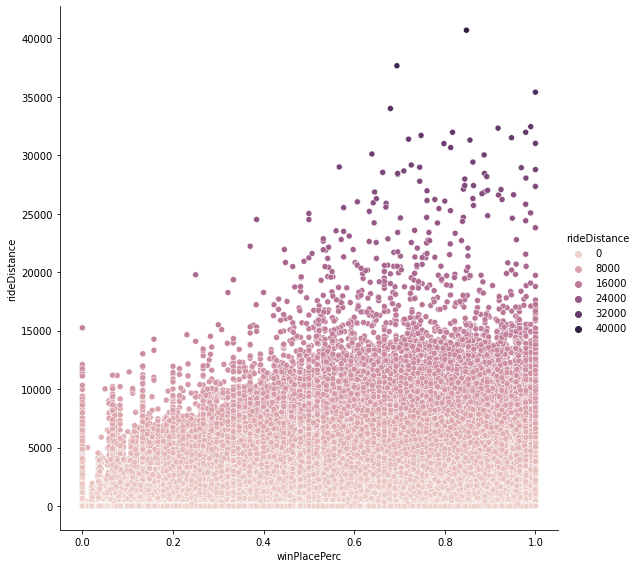

In [ ]:
sns.relplot(x="winPlacePerc", y="rideDistance", data=train,hue="rideDistance", height=8)
plt.show()
plt.close()

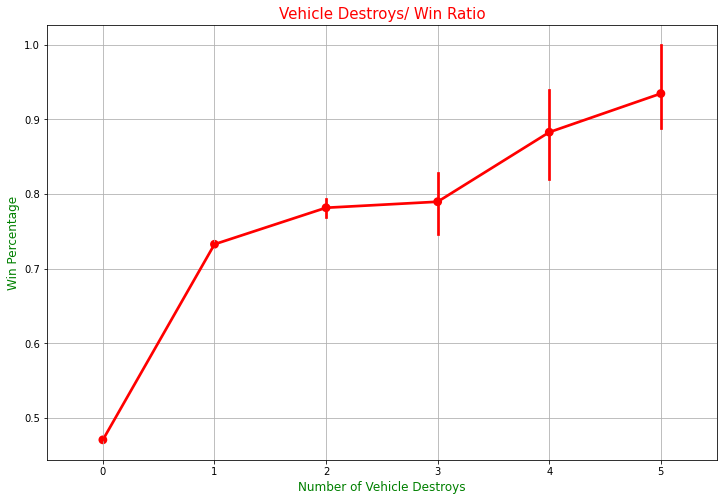

In [ ]:
f,ax1 = plt.subplots(figsize =(12,8))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=train,color='red',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 12,color='green')
plt.ylabel('Win Percentage',fontsize = 12,color='green')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 15,color='red')
plt.grid()
plt.show()
plt.close()

In [ ]:
# rideDistance anomalies
display(train[train['rideDistance'] >= 50000].shape)
train[train['rideDistance'] >= 50000].head(10)

(0, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate


In [ ]:
# Remove outliers
train.drop(train[train['rideDistance'] >= 50000].index, inplace=True)

#Swim Distance

In [ ]:
print("the olympic champion swimmed for {}m.".format(train['swimDistance'].max()))

the olympic champion swimmed for 3824.0m.


In [ ]:
print("the beginner swimmed for {}m.".format(train['swimDistance'].min()))

the beginner swimmed for 0.0m.


In [ ]:
print("The average person swims for {:.1f}m.".format(train['swimDistance'].mean()))

The average person swims for 4.5m.


In [ ]:
print("99% of people have swimemd {}m or less".format(train['swimDistance'].quantile(0.99)))

99% of people have swimemd 122.9m or less


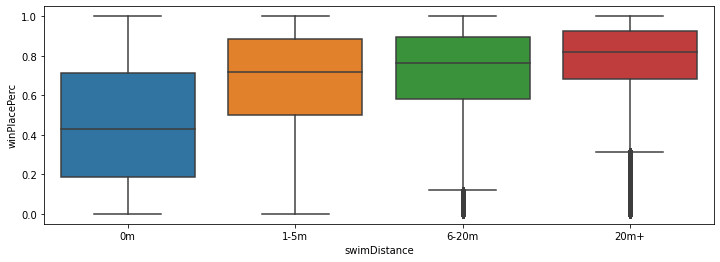

In [ ]:
swim = train.copy()
swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0, 5, 20, 5286], labels=['0m','1-5m', '6-20m', '20m+'])
plt.figure(figsize=(12,4))
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim)
plt.show()
plt.close()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


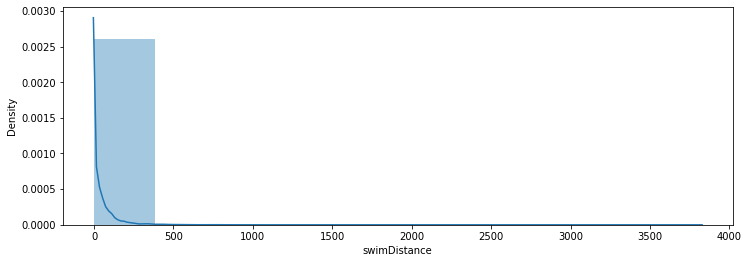

In [ ]:
# Plot the distribution of swimDistance
plt.figure(figsize=(12,4))
sns.distplot(train['swimDistance'], bins=10)
plt.show()
plt.close()

In [ ]:
# Players who swam more than 2 km
train[train['swimDistance'] >= 2000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate
177973,c2e9e5631f4e54,23213058f83abe,f01eb1073ef377,0,5.0,78.1,1,0,1,47,...,2296.0,0.0,0,1002.000,4,1466,0.9590,3298.000,False,0.000000
274258,ba5e3dfb5a0fa0,383db055216ec2,d6e13468e28ab4,0,4.0,53.3,0,0,16,39,...,2148.0,0.0,0,2276.000,5,0,0.9600,10114.000,False,0.000000
1005337,d50c9d0e65fe2a,4996575c11abcb,668402592429f8,0,1.0,503.0,4,3,1,6,...,2718.0,0.0,0,4692.000,5,1516,1.0000,10742.000,False,1.000000
1195818,f811de9de80b70,d08ddf7beb6252,8a48703ab52ec8,0,7.0,352.2,3,1,6,4,...,2668.0,0.0,0,415.000,10,1499,1.0000,3083.000,False,0.200000
1227362,a33e917875c80e,5b72674b42712b,5fb0d8b1fc16cf,0,1.0,589.0,3,1,1,46,...,3824.0,0.0,0,995.500,9,0,1.0000,4819.500,False,0.500000
1889163,bd8cc3083a9923,1d5d17140d6fa4,8e2e6022d6e5c8,0,0.0,0.0,0,0,0,47,...,2484.0,0.0,0,1966.000,3,0,0.5835,5314.000,False,0.000000
2065940,312ccbb27b99aa,47c7f4d69e2fb1,b4b11756321f3a,1,3.0,49.6,0,0,5,48,...,3514.0,0.0,0,4296.000,8,1492,0.8510,9898.000,False,0.000000
2327586,8773d0687c6aae,b17f46f9f6666c,56ee5897512c86,3,1.0,474.5,2,0,0,7,...,2388.0,0.0,0,7.547,6,0,1.0000,2395.547,False,0.000000
2784855,a8653b87e83892,383db055216ec2,d6e13468e28ab4,1,4.0,844.0,5,5,2,2,...,2206.0,0.0,0,4690.000,4,0,0.9600,9928.000,False,0.714286
3359439,3713b36e1ba9e1,1f7aed9240864a,584447ed875c85,0,0.0,0.0,0,0,0,77,...,2338.0,0.0,0,1750.000,0,1518,0.2144,4088.000,False,0.000000


In [ ]:
# Remove outliers
train.drop(train[train['swimDistance'] >= 2000].index, inplace=True)

#Healings and Boosts

In [ ]:
print("The Max boost used {}.".format(train['boosts'].max()))

The Max boost used 33.0.


In [ ]:
print("The Min boost used {}.".format(train['boosts'].min()))

The Min boost used 0.0.


In [ ]:
print("The average person uses {:.1f} heal items".format(train['heals'].mean()))

In [ ]:
print("99% of people use {} or less".format(train['heals'].quantile(0.99)))

99% of people use 12.0 or less


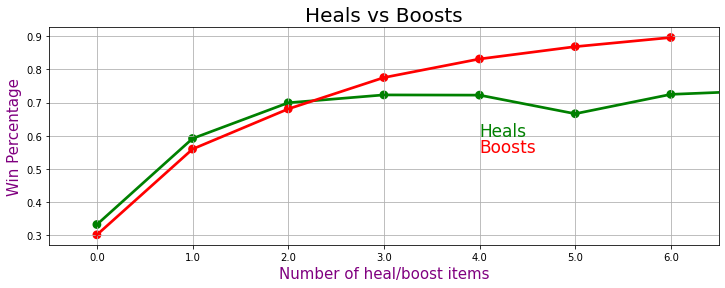

In [ ]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(12,4))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='green',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='red',alpha=0.8)

plt.text(4,0.55,'Boosts',color='red',fontsize = 17)
plt.text(4,0.6,'Heals',color='green',fontsize = 17)

plt.xlabel('Number of heal/boost items',fontsize = 15,color='purple')
plt.ylabel('Win Percentage',fontsize = 15,color='purple')
plt.title('Heals vs Boosts',fontsize = 20,color='black')
plt.grid()
plt.show()
plt.close()

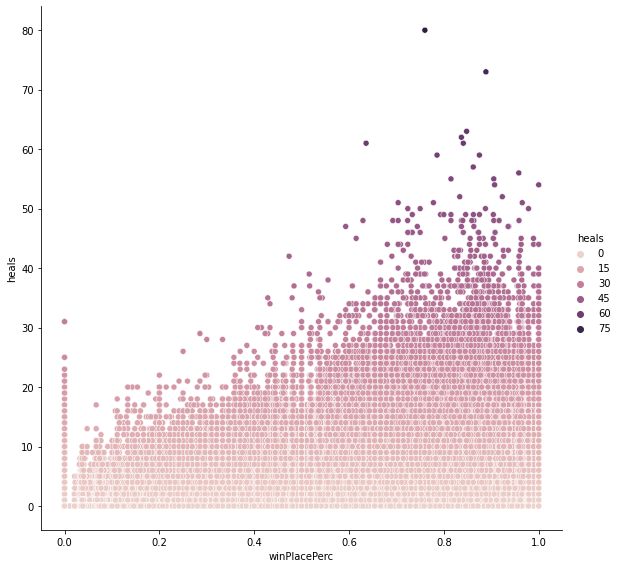

In [ ]:
sns.relplot(x="winPlacePerc", y="heals", data=train,hue="heals" ,height=8)
plt.show()
plt.close()

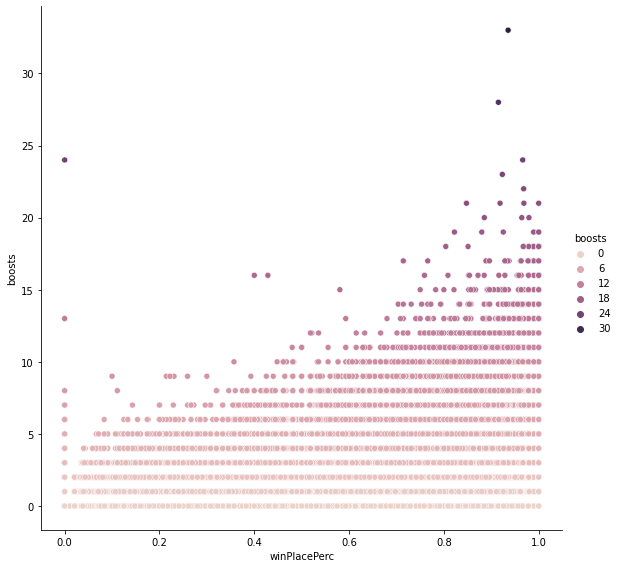

In [ ]:
sns.relplot(x="winPlacePerc", y="boosts", data=train,hue="boosts" ,height=8)
plt.show()
plt.close()

In [ ]:
# 40 or more healing items used
display(train[train['boosts'] >= 40].shape)
train[train['boosts'] >= 40].head(10)

(0, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate


In [ ]:
# Remove outliers
train.drop(train[train['boosts'] >= 40].index, inplace=True)

In [ ]:
# 40 or more healing items used
display(train[train['heals'] >= 40].shape)
train[train['heals'] >= 40].head(10)

(135, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate
18405,63ab976895d860,927eeba5614c4f,69473402649f11,0,2.0,0.0,0,0,47,43,...,0.000,0.0,0,1387.0,6,0,0.9370,6855.000,False,0.000000
54463,069ddee7c9d26a,58ab5a1ce8e06f,942416b6caf21e,1,4.0,182.0,0,1,43,21,...,292.500,0.0,0,2792.0,7,0,0.9614,3084.500,False,1.000000
126439,c45bd6917146e2,81ab9f863957cb,4335664c6716fa,0,2.0,0.0,0,0,52,49,...,3.443,0.0,0,1340.0,3,1543,0.8335,1343.443,False,0.000000
259351,86910c38335c2f,2738398928d28c,7d2911e944bfaa,0,10.0,0.0,0,0,42,45,...,0.000,0.0,0,1510.0,6,0,0.8647,7446.000,False,0.000000
268747,a007734fbc6ebf,5bf702dfa1e5d4,ad6b5669d33a2c,0,5.0,0.0,0,0,48,43,...,0.000,0.0,0,1968.0,9,0,0.8370,5816.000,False,0.000000
269098,a0891dbc2950ea,dde848d90491ba,b4fd3348551b73,0,2.0,0.0,0,0,42,44,...,0.000,0.0,0,2440.0,2,1511,0.9260,2440.000,False,0.000000
284195,91a2fb00455eb3,f639b09774c5b1,65b73c71653822,0,3.0,123.0,0,0,40,52,...,0.000,0.0,0,2252.0,8,0,0.8276,4848.000,False,0.000000
300204,1f4f2efc86bfcb,3d668492d1fca9,d3638466a43d38,0,6.0,175.0,2,1,47,25,...,0.000,0.0,0,2928.0,3,1562,0.9355,3415.500,False,1.000000
349908,7725ad71ad2ff7,4b2a7cf86d1546,cfa2775c9ef944,3,0.0,2348.0,0,8,41,9,...,0.000,0.0,0,268.8,33,1500,0.8887,268.800,False,0.296296
375156,d64866c78ebcb0,aa0f089ae6430c,4dbc4ebba33ec6,0,7.0,278.5,3,1,44,3,...,0.000,0.0,0,2488.0,6,1517,0.9630,4926.000,False,0.250000


In [ ]:
# Remove outliers
train.drop(train[train['heals'] >= 40].index, inplace=True)

#Weapons

In [ ]:
print("The Maxweapons used {}.".format(train['weaponsAcquired'].max()))

The Maxweapons used 236.


In [ ]:
print("The Min weapons used {}.".format(train['weaponsAcquired'].max()))

The Min weapons used 236.


In [ ]:
print("The average person uses {:.1f} weapons".format(train['weaponsAcquired'].mean()))

The average person uses 3.7 weapons


In [ ]:
print("99% of people use {} or less".format(train['weaponsAcquired'].quantile(0.99)))

99% of people use 10.0 or less


In [ ]:
print("{} players acquired weapons".format(len(train[train['weaponsAcquired'] == 0])))

226573 players acquired weapons


In [ ]:
print("{:.4f}% players acquired weapons".format(100*len(train[train['weaponsAcquired']==0])/len(train)))

5.0954% players acquired weapons


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


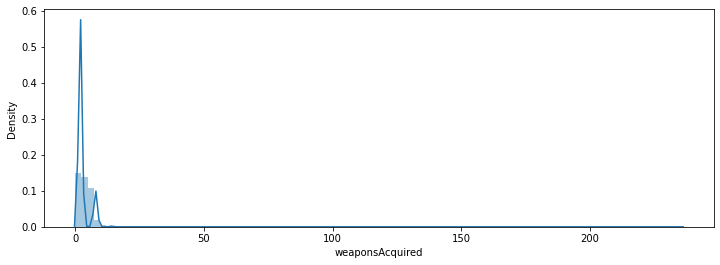

In [ ]:
# Plot the distribution of weaponsAcquired
plt.figure(figsize=(12,4))
sns.distplot(train['weaponsAcquired'], bins=100)
plt.show()
plt.close()

In [ ]:
# Players who acquired more than 80 weapons
display(train[train['weaponsAcquired'] >= 80].shape)
train[train['weaponsAcquired'] >= 80].head()

(21, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate
233643,7c8c83f5f97d0f,b33b210a52a2f8,2e8a0917a71c43,0,0.0,67.1,0,0,0,44,...,0.00,0.0,0,1307.0,128,1577,0.711,3187.00,False,0.000000
588387,c58e3e0c2ba678,3d3e6100c07ff0,d04dbb98249f76,0,1.0,175.2,1,0,2,48,...,0.00,0.0,0,1687.0,80,0,0.750,1687.00,False,0.000000
1437471,8f0c855d23e4cd,679c3316056de8,fbaf1b3ae1d884,1,0.0,100.0,0,0,0,24,...,47.22,0.0,0,2400.0,102,0,0.893,5299.22,False,0.000000
1449293,db54cf45b9ed1c,898fccaeeb041d,484b4ae51fe80f,0,0.0,0.0,0,0,0,54,...,0.00,0.0,0,653.0,95,0,0.560,653.00,False,0.000000
1462706,be4ff9afaa5bb1,abb73dd57619fa,f900de1ec39fa5,22,0.0,5376.0,0,8,4,3,...,0.00,0.0,0,1128.0,83,0,0.800,2082.50,False,0.150943


In [ ]:
# Remove outliers
train.drop(train[train['weaponsAcquired'] >= 80].index, inplace=True)

#Solo Duos Squads

In [ ]:
solos = train[train['numGroups']>50]
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)]
squads = train[train['numGroups']<=25]

In [ ]:
print("There are {} solo games".format(len(solos)))
print("There are {} duo games".format(len(duos)))
print("There are {} squad games".format(len(squads)))

There are 708706 solo games
There are 3293763 duo games
There are 442332 squad games


In [ ]:
print("There are {:.2f}% solo games".format(100*len(solos)/len(train)))
print("There are {:.2f}% duo games".format(100*len(duos)/len(train)))
print("There are {:.2f}% squad games".format(100*len(squads)/len(train)))

There are 15.94% solo games
There are 74.07% duo games
There are 9.95% squad games


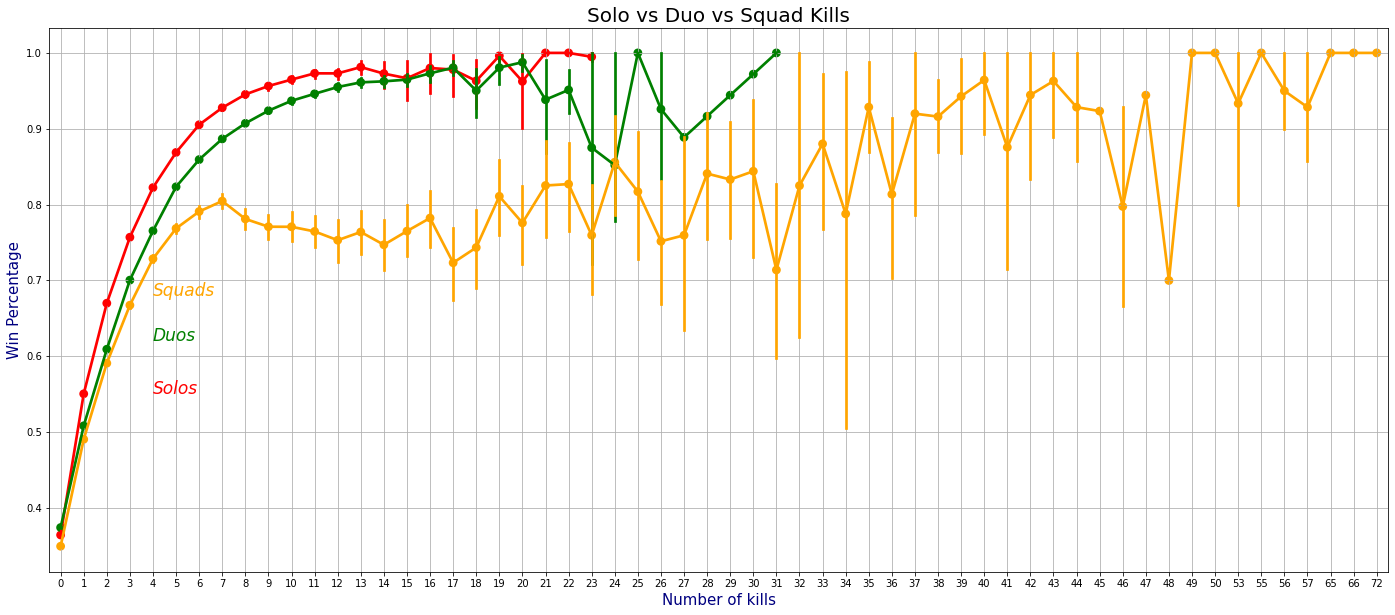

In [ ]:
plt.subplots(figsize=(24,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='red',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='green',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='orange',alpha=0.8)

plt.text(4,0.55,'Solos',color='red',fontsize = 17,style = 'italic')
plt.text(4,0.62,'Duos',color='green',fontsize = 17,style = 'italic')
plt.text(4,0.68,'Squads',color='orange',fontsize = 17,style = 'italic')

plt.xlabel('Number of kills',fontsize = 15,color='navy')
plt.ylabel('Win Percentage',fontsize = 15,color='navy')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='black')

plt.grid()
plt.show()
plt.close()

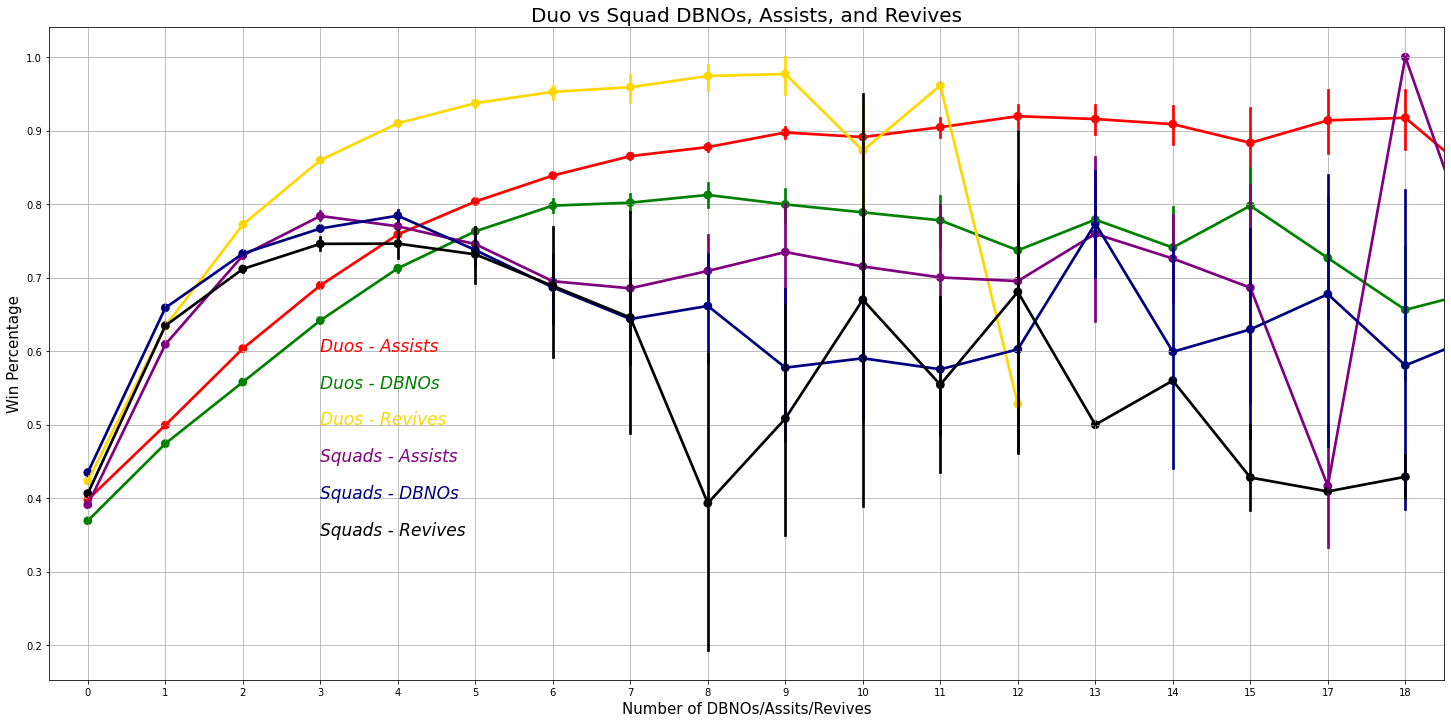

In [ ]:
f,ax1 = plt.subplots(figsize =(25,12))

sns.pointplot(x='DBNOs',y='winPlacePerc',data=duos,color='red',alpha=0.8)
sns.pointplot(x='DBNOs',y='winPlacePerc',data=squads,color='green',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=duos,color='gold',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=squads,color='purple',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=duos,color='navy',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=squads,color='black',alpha=0.8)

plt.text(3,0.6,'Duos - Assists',color='red',fontsize = 17,style = 'italic')
plt.text(3,0.55,'Duos - DBNOs',color='green',fontsize = 17,style = 'italic')
plt.text(3,0.50,'Duos - Revives',color='gold',fontsize = 17,style = 'italic')
plt.text(3,0.45,'Squads - Assists',color='purple',fontsize = 17,style = 'italic')
plt.text(3,0.40,'Squads - DBNOs',color='navy',fontsize = 17,style = 'italic')
plt.text(3,0.35,'Squads - Revives',color='black',fontsize = 17,style = 'italic')

plt.xlabel('Number of DBNOs/Assits/Revives',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('Duo vs Squad DBNOs, Assists, and Revives',fontsize = 20,color='black')
plt.grid()
plt.show()

#Match Types

In [ ]:
print('There are {} different Match types in the dataset.'.format(train['matchType'].nunique()))

There are 16 different Match types in the dataset.


In [ ]:
train.matchType.value_counts()

squad-fpp           1755875
duo-fpp              996472
squad                626412
solo-fpp             536623
duo                  313534
solo                 181898
normal-squad-fpp      17172
crashfpp               6286
normal-duo-fpp         5488
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


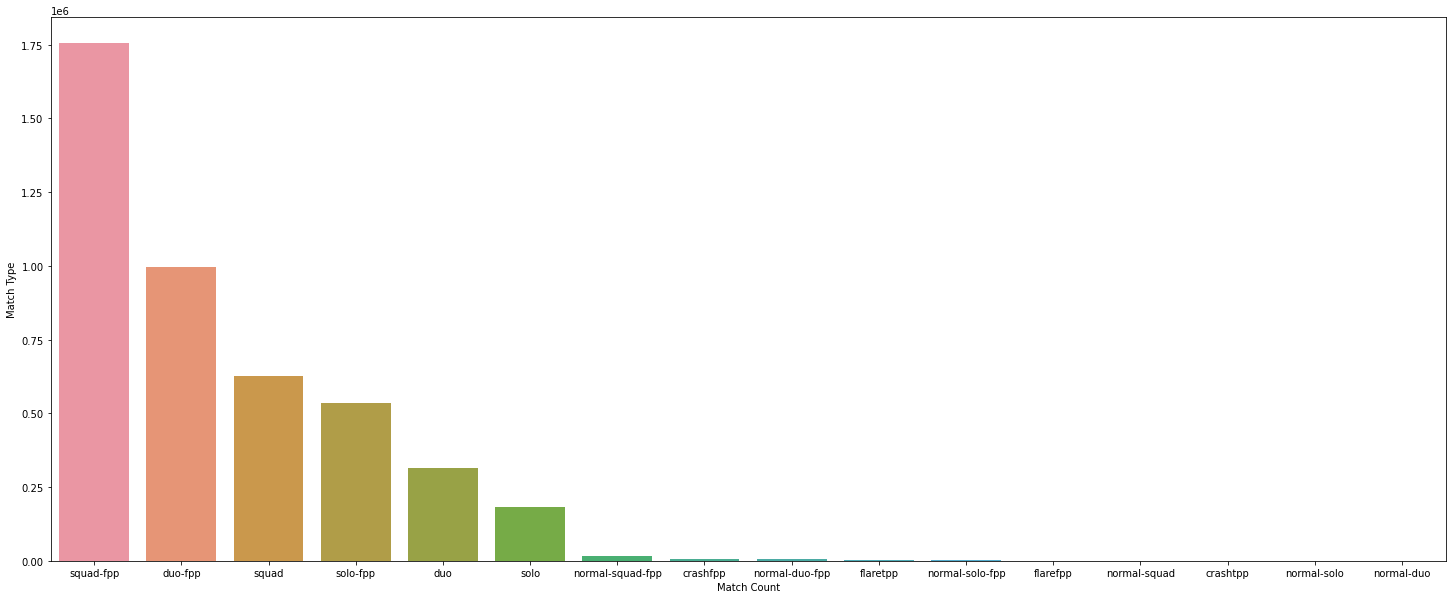

In [ ]:
f,ax = plt.subplots(figsize=(25,10))
sns.barplot(train.matchType.value_counts().index,train.matchType.value_counts().values)
plt.xlabel('Match Count')
plt.ylabel('Match Type')
plt.show()

In [ ]:
# One hot encode matchType
train = pd.get_dummies(train, columns=['matchType'])
# Take a look at the encoding
matchType_encoding = train.filter(regex='matchType')
matchType_encoding.head()

,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#Decision Tree

In [ ]:
Train='/content/drive/MyDrive/data1 files/pubg_train.csv'
Test='/content/drive/MyDrive/data1 files/pubg_test.csv'
train=pd.read_csv(Train)
test=pd.read_csv(Test)

In [ ]:
data=train.copy()
data1=test.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 30 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   Id               object 
 2   groupId          object 
 3   matchId          object 
 4   assists          int64  
 5   boosts           float64
 6   damageDealt      float64
 7   DBNOs            int64  
 8   headshotKills    int64  
 9   heals            int64  
 10  killPlace        int64  
 11  killPoints       float64
 12  kills            int64  
 13  killStreaks      float64
 14  longestKill      float64
 15  matchDuration    int64  
 16  matchType        object 
 17  maxPlace         float64
 18  numGroups        float64
 19  rankPoints       int64  
 20  revives          int64  
 21  rideDistance     float64
 22  roadKills        int64  
 23  swimDistance     float64
 24  teamKills        float64
 25  vehicleDestroys  int64  
 26  walkDistance     float64
 27  weaponsAcqui

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934174 entries, 0 to 1934173
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   Id               object 
 2   groupId          object 
 3   matchId          object 
 4   assists          int64  
 5   boosts           float64
 6   damageDealt      float64
 7   DBNOs            int64  
 8   headshotKills    int64  
 9   heals            int64  
 10  killPlace        int64  
 11  killPoints       float64
 12  kills            int64  
 13  killStreaks      float64
 14  longestKill      float64
 15  matchDuration    int64  
 16  matchType        object 
 17  maxPlace         float64
 18  numGroups        float64
 19  rankPoints       int64  
 20  revives          int64  
 21  rideDistance     float64
 22  roadKills        int64  
 23  swimDistance     float64
 24  teamKills        float64
 25  vehicleDestroys  int64  
 26  walkDistance     float64
 27  weaponsAcqui

In [ ]:
encoder1=LabelEncoder()
data['Id']=encoder1.fit_transform(data['Id'])

encoder1=LabelEncoder()
data['groupId']=encoder1.fit_transform(data['groupId'])

encoder1=LabelEncoder()
data['matchId']=encoder1.fit_transform(data['matchId'])

encoder1=LabelEncoder()
data['matchType']=encoder1.fit_transform(data['matchType'])

In [ ]:
encoder1=LabelEncoder()
data1['Id']=encoder1.fit_transform(data1['Id'])

encoder1=LabelEncoder()
data1['groupId']=encoder1.fit_transform(data1['groupId'])

encoder1=LabelEncoder()
data1['matchId']=encoder1.fit_transform(data1['matchId'])

encoder1=LabelEncoder()
data1['matchType']=encoder1.fit_transform(data1['matchType'])

In [ ]:
encoder1=LabelEncoder()
data['boosts']=encoder1.fit_transform(data['boosts'])

encoder1=LabelEncoder()
data['damageDealt']=encoder1.fit_transform(data['damageDealt'])

encoder1=LabelEncoder()
data['killPoints']=encoder1.fit_transform(data['killPoints'])

encoder1=LabelEncoder()
data['killStreaks']=encoder1.fit_transform(data['killStreaks'])

encoder1=LabelEncoder()
data['longestKill']=encoder1.fit_transform(data['longestKill'])

encoder1=LabelEncoder()
data['maxPlace']=encoder1.fit_transform(data['maxPlace'])

encoder1=LabelEncoder()
data['numGroups']=encoder1.fit_transform(data['numGroups'])

encoder1=LabelEncoder()
data['rideDistance']=encoder1.fit_transform(data['rideDistance'])

encoder1=LabelEncoder()
data['swimDistance']=encoder1.fit_transform(data['swimDistance'])

encoder1=LabelEncoder()
data['teamKills']=encoder1.fit_transform(data['teamKills'])

encoder1=LabelEncoder()
data['walkDistance']=encoder1.fit_transform(data['walkDistance'])

#encoder1=LabelEncoder()
#data['winPlacePerc']=encoder1.fit_transform(data['winPlacePerc'])

In [ ]:
data=data.fillna(0)
data1=data1.fillna(0)

In [ ]:
features = data.drop(['winPlacePerc'],axis=1)
X=features
y = data['winPlacePerc']

In [ ]:
lab=preprocessing.LabelEncoder()
y=lab.fit_transform(data['winPlacePerc'])

In [ ]:
X=X.head(100000).copy()

In [ ]:
y=y[:100000].copy()

In [ ]:
xt=data1.copy()

In [ ]:
xt=xt.head(100000).copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((80000, 29), (20000, 29))

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=4)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
test_pred = dt_model.predict(X_test)
train_pred = dt_model.predict(X_train)

In [ ]:
print("Accuracy: ",metrics.accuracy_score(y_test, test_pred)*100)
print('MSE: ',metrics.mean_squared_error(y_test, test_pred)*100)
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred))*100)

Accuracy:  7.8149999999999995
MSE:  51902971.795
RMSE:  72043.71714105262


In [ ]:
cr = metrics.classification_report(y_test,test_pred)
print(cr)

#Random Forest

In [ ]:
Train='/content/drive/MyDrive/data1 files/pubg_train.csv'
Test='/content/drive/MyDrive/data1 files/pubg_test.csv'
data=pd.read_csv(Train)
data1=pd.read_csv(Test)

In [ ]:
encoder1=LabelEncoder()
data['Id']=encoder1.fit_transform(data['Id'])

encoder1=LabelEncoder()
data['groupId']=encoder1.fit_transform(data['groupId'])

encoder1=LabelEncoder()
data['matchId']=encoder1.fit_transform(data['matchId'])

encoder1=LabelEncoder()
data['matchType']=encoder1.fit_transform(data['matchType'])

In [ ]:
data=data.fillna(0)
data1=data1.fillna(0)

In [ ]:
features = data.drop(['winPlacePerc'],axis=1)
X=features
y = data['winPlacePerc']

In [ ]:
lab=preprocessing.LabelEncoder()
y=lab.fit_transform(data['winPlacePerc'])

In [ ]:
X=X.head(100000)
y=y[:100000]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((80000, 29), (20000, 29))

In [ ]:
rf_clf = RandomForestClassifier(max_depth=4, n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [ ]:
rf_test_pred = rf_clf.predict(X_test)
rf_train_pred = rf_clf.predict(X_train)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, rf_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
plt.close()

In [ ]:
print("Accuracy: ",metrics.accuracy_score(y_test, rf_test_pred)*100)
print('MSE: ',metrics.mean_squared_error(y_test, rf_test_pred)*100)
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, rf_test_pred))*100)

Accuracy:  7.76
MSE:  67441260.60000001
RMSE:  82122.62818492841


In [ ]:
cr = metrics.classification_report(y_test, rf_test_pred)
print(cr)

#Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Train='/content/drive/MyDrive/data1 files/pubg_train.csv'
Test='/content/drive/MyDrive/data1 files/pubg_test.csv'
data=pd.read_csv(Train)
data1=pd.read_csv(Test)

In [ ]:
data=data.drop('Unnamed: 0',axis=1)
data1=data1.drop('Unnamed: 0',axis=1)

In [ ]:
encoder1=LabelEncoder()
data['Id']=encoder1.fit_transform(data['Id'])

encoder1=LabelEncoder()
data['groupId']=encoder1.fit_transform(data['groupId'])

encoder1=LabelEncoder()
data['matchId']=encoder1.fit_transform(data['matchId'])

encoder1=LabelEncoder()
data['matchType']=encoder1.fit_transform(data['matchType'])

In [ ]:
data=data.fillna(0)
data1=data1.fillna(0)

In [ ]:
features = data.drop(['winPlacePerc'],axis=1)
X=features
y = data['winPlacePerc']

In [ ]:
lab=preprocessing.LabelEncoder()
y=lab.fit_transform(data['winPlacePerc'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3557572, 28), (889394, 28))

In [ ]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [ ]:
print("Accuracy: ",model.score(X_train, y_train)*100)

Accuracy:  82.06641941017338


#Submission

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
trainpath='/content/drive/MyDrive/data1 files/pubg_train.csv'
testpath='/content/drive/MyDrive/data1 files/pubg_test.csv'
samplepath='/content/drive/MyDrive/data1 files/sample_submission.xlsx'

In [ ]:
train = pd.read_csv(trainpath)
test = pd.read_csv(testpath)
sample= pd.read_excel(samplepath)

In [ ]:
train.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0.0,0.0,0,0,0,...,0,0.0000,0,0.00,0.0,0,244.80,1,1466,0.4443
1,1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0.0,91.5,0,0,0,...,0,0.0045,0,11.04,0.0,0,1434.00,5,0,0.6400
2,2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0.0,68.0,0,0,0,...,0,0.0000,0,0.00,0.0,0,161.80,2,0,0.7754
3,3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0.0,32.9,0,0,0,...,0,0.0000,0,0.00,0.0,0,202.80,3,0,0.1667
4,4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0.0,100.0,0,0,0,...,0,0.0000,0,0.00,0.0,0,49.75,2,0,0.1875


In [ ]:
test.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0.0,51.47,0,0,0,...,1500,0,0.0,0,0.0,0.0,0,588.0,1,0
1,1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4.0,179.10,0,0,2,...,1503,2,4668.0,0,0.0,0.0,0,2017.0,6,0
2,2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0.0,23.40,0,0,4,...,1565,0,0.0,0,0.0,0.0,0,788.0,4,0
3,3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0.0,65.50,0,0,0,...,1465,0,0.0,0,0.0,0.0,0,1812.0,3,0
4,4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4.0,330.20,1,2,1,...,1480,1,0.0,0,0.0,0.0,0,2964.0,4,0


In [ ]:
train=train.fillna(method='ffill')
train.drop(['Id','groupId','matchId'],inplace=True,axis=1)
test.drop(['Id','groupId','matchId'],inplace=True,axis=1)

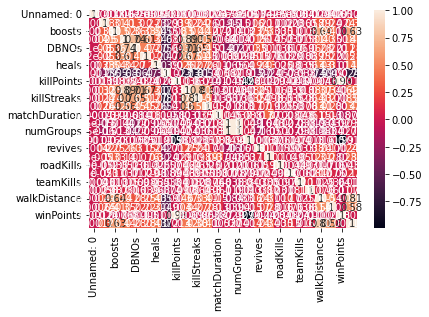

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Unnamed: 0,1.000000,0.000133,0.000161,-0.000254,-0.000071,-0.000062,0.000335,0.000128,-0.001093,-0.000127,...,0.000425,0.000053,0.000079,0.000015,0.000412,0.000291,-0.000423,-0.000654,-0.001182,0.000124
assists,0.000133,1.000000,0.307220,0.406726,0.301057,0.198289,0.228556,-0.290062,0.039061,0.319690,...,0.198320,0.110598,0.011903,0.023348,0.006116,0.057921,0.290306,0.243882,0.024014,0.299442
boosts,0.000161,0.307220,1.000000,0.521178,0.358409,0.334138,0.535074,-0.554015,0.008347,0.501267,...,0.252711,0.328157,0.035068,0.107737,0.013025,0.087237,0.639172,0.405998,-0.007621,0.633271
damageDealt,-0.000254,0.406726,0.521178,1.000000,0.735763,0.613410,0.342987,-0.677398,0.049893,0.888784,...,0.256951,0.140827,0.052487,0.036708,0.015478,0.081182,0.398199,0.353249,0.017762,0.440507
DBNOs,-0.000071,0.301057,0.358409,0.735763,1.000000,0.469923,0.265485,-0.555289,0.042624,0.707848,...,0.300999,0.102496,0.036093,0.017326,0.069363,0.060210,0.284660,0.218161,0.011108,0.279972
headshotKills,-0.000062,0.198289,0.334138,0.613410,0.469923,1.000000,0.199918,-0.469829,0.023989,0.674275,...,0.150145,0.076470,0.013369,0.028512,0.008650,0.039200,0.250982,0.217552,0.004982,0.277722
heals,0.000335,0.228556,0.535074,0.342987,0.265485,0.199918,1.000000,-0.386032,-0.002585,0.311781,...,0.236680,0.297354,0.024619,0.079549,0.035340,0.062870,0.430266,0.309071,-0.010990,0.427857
killPlace,0.000128,-0.290062,-0.554015,-0.677398,-0.555289,-0.469829,-0.386032,1.000000,-0.023277,-0.730498,...,-0.269804,-0.236102,-0.057356,-0.089354,-0.037771,-0.073569,-0.590236,-0.490143,-0.002415,-0.719067
killPoints,-0.001093,0.039061,0.008347,0.049893,0.042624,0.023989,-0.002585,-0.023277,1.000000,0.036190,...,0.012050,-0.029284,-0.004169,-0.004603,-0.039641,-0.009653,0.004623,-0.003971,0.983126,0.012904
kills,-0.000127,0.319690,0.501267,0.888784,0.707848,0.674275,0.311781,-0.730498,0.036190,1.000000,...,0.253323,0.114695,0.063651,0.039121,0.017601,0.079991,0.374774,0.336414,0.006929,0.419915


In [ ]:
corrMatrix=train.corr()
sn.heatmap(corrMatrix, annot=True)
plt.savefig('heatmap.png')
plt.show()
corrMatrix

In [ ]:
xtrain=train[['boosts','walkDistance','weaponsAcquired','damageDealt','kills']]
ytrain=train['winPlacePerc']
xtest=test[['boosts','walkDistance','weaponsAcquired','damageDealt','kills']]

In [ ]:
PUBGM=HistGradientBoostingRegressor().fit(xtrain,ytrain)
ytest=PUBGM.predict(xtest)

In [ ]:
df_submit = sample.copy()
df_submit['winPlacePerc']=ytest
df_submit.to_csv('/content/drive/MyDrive/data1 files/submission_final.csv', index=False)

In [ ]:
df_submit.winPlacePerc.max()

1.0203782572202518

In [ ]:
df_submit.winPlacePerc.min()

0.022895849691305453

In [ ]:
df_submit.head()

,Id,winPlacePerc
0,9329eb41e215eb,0.315357
1,639bd0dcd7bda8,0.799856
2,63d5c8ef8dfe91,0.444751
3,cf5b81422591d1,0.622521
4,ee6a295187ba21,0.892510


#Submission 2

In [ ]:
trainpath='/content/drive/MyDrive/data1 files/pubg_train.csv'
testpath='/content/drive/MyDrive/data1 files/pubg_test.csv'
samplepath='/content/drive/MyDrive/data1 files/sample_submission.xlsx'

In [ ]:
data = pd.read_csv(trainpath)
data1 = pd.read_csv(testpath)
sample= pd.read_excel(samplepath)

In [ ]:
data=data.drop('Unnamed: 0',axis=1)
data1=data1.drop('Unnamed: 0',axis=1)

In [ ]:
encoder1=LabelEncoder()
data['Id']=encoder1.fit_transform(data['Id'])

encoder1=LabelEncoder()
data['groupId']=encoder1.fit_transform(data['groupId'])

encoder1=LabelEncoder()
data['matchId']=encoder1.fit_transform(data['matchId'])

encoder1=LabelEncoder()
data['matchType']=encoder1.fit_transform(data['matchType'])

In [ ]:
encoder1=LabelEncoder()
data1['Id']=encoder1.fit_transform(data1['Id'])

encoder1=LabelEncoder()
data1['groupId']=encoder1.fit_transform(data1['groupId'])

encoder1=LabelEncoder()
data1['matchId']=encoder1.fit_transform(data1['matchId'])

encoder1=LabelEncoder()
data1['matchType']=encoder1.fit_transform(data1['matchType'])

In [ ]:
data=data.fillna(method='ffill')
data1=data1.fillna(method='ffill')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               int64  
 1   groupId          int64  
 2   matchId          int64  
 3   assists          int64  
 4   boosts           float64
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       float64
 11  kills            int64  
 12  killStreaks      float64
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        int64  
 16  maxPlace         float64
 17  numGroups        float64
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        float64
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,4446966.0,2.223482e+06,1.283729e+06,0.0,1111741.25,2.223482e+06,3.335224e+06,4446965.0
groupId,4446966.0,1.013395e+06,5.849786e+05,0.0,506888.00,1.013704e+06,1.520062e+06,2026744.0
matchId,4446966.0,2.397279e+04,1.384781e+04,0.0,11981.00,2.397600e+04,3.596600e+04,47964.0
assists,4446966.0,2.338149e-01,5.885731e-01,0.0,0.00,0.000000e+00,0.000000e+00,22.0
boosts,4446966.0,1.106924e+00,1.715716e+00,0.0,0.00,0.000000e+00,2.000000e+00,33.0
damageDealt,4446966.0,1.307170e+02,1.707806e+02,0.0,0.00,8.425000e+01,1.860000e+02,6616.0
DBNOs,4446966.0,6.578755e-01,1.145743e+00,0.0,0.00,0.000000e+00,1.000000e+00,53.0
headshotKills,4446966.0,2.268196e-01,6.021553e-01,0.0,0.00,0.000000e+00,0.000000e+00,64.0
heals,4446966.0,1.370147e+00,2.679982e+00,0.0,0.00,0.000000e+00,2.000000e+00,80.0
killPlace,4446966.0,4.759935e+01,2.746294e+01,1.0,24.00,4.700000e+01,7.100000e+01,101.0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934174 entries, 0 to 1934173
Data columns (total 28 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               int64  
 1   groupId          int64  
 2   matchId          int64  
 3   assists          int64  
 4   boosts           float64
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       float64
 11  kills            int64  
 12  killStreaks      float64
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        int64  
 16  maxPlace         float64
 17  numGroups        float64
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        float64
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

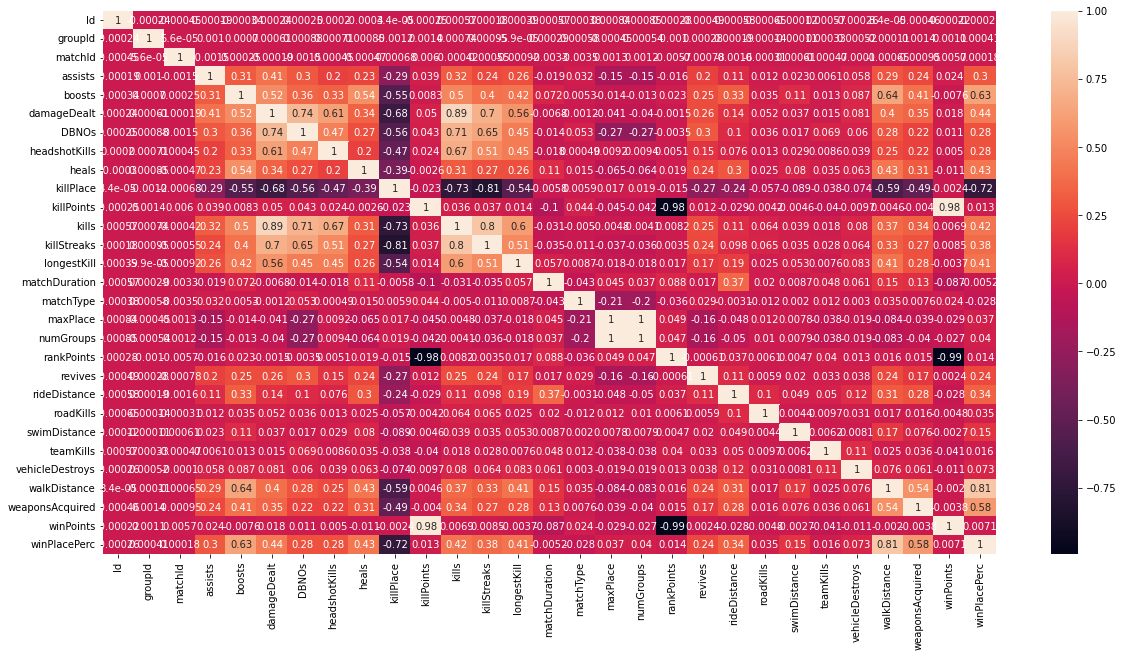

In [ ]:
fig=plt.figure(figsize=(20,10))
corrMatrix=data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
plt.close()

In [ ]:
X= data.drop(['winPlacePerc'],axis=1)
y = data['winPlacePerc']
Xt=data1.copy()

In [ ]:
lab=preprocessing.LabelEncoder()
y=lab.fit_transform(data['winPlacePerc'])

In [ ]:
PUBG_Model=HistGradientBoostingRegressor().fit(X,y)
ytest=PUBG_Model.predict(Xt)

In [ ]:
df= sample.copy()
df['winPlacePerc']=ytest

In [ ]:
df.loc[df.winPlacePerc >= 1, "winPlacePerc"] = 1
df.loc[df.winPlacePerc <= 0, "winPlacePerc"] = 0

In [ ]:
df.to_csv('/content/drive/MyDrive/data1 files/submission_final.csv', index=False)

In [ ]:
df

,Id,winPlacePerc
0,9329eb41e215eb,1.0
1,639bd0dcd7bda8,1.0
2,63d5c8ef8dfe91,1.0
3,cf5b81422591d1,1.0
4,ee6a295187ba21,1.0
...,...,...
1934169,a316c3a13887d5,1.0
1934170,5312146b27d875,1.0
1934171,fc8818b5b32ad3,1.0
1934172,a0f91e35f8458f,1.0


In [ ]:
df.head(10)

,Id,winPlacePerc
0,9329eb41e215eb,1.0
1,639bd0dcd7bda8,1.0
2,63d5c8ef8dfe91,1.0
3,cf5b81422591d1,1.0
4,ee6a295187ba21,1.0
5,3e2539b5d78183,1.0
6,d812d2f1d88a02,1.0
7,a8a377e4d43bf8,1.0
8,f18301e30d47d3,1.0
9,ec7b965ef978b3,1.0


In [ ]:
df.winPlacePerc.max()

1.0

In [ ]:
df.winPlacePerc.min()

0.0